In [1]:
import os
import json
import matplotlib.pyplot as plt
import pandas as pd

import pdgaTournamentPlotterFunctions as plotfuncts

# Create DataFrame

Load scraped data that was saved to a `.json` file into a Pandas DataFrame.  Unideal features of the dataset:
*

Missing values:
* No PDGA # or rating
* Did not finish round and assigned '999'


In [2]:
dataPath = './tournament-data'

print('Available data sets:')
for d in os.listdir(dataPath):
    print(d)

Available data sets:
pdgaEvent31742.json
pdgaEvent40638.json
pdgaEvent30718.json


In [3]:
# Select which dataset is to be examined
#eventID = 30718 # Delaware 2017
#eventID = 31742 # Paws and Claws 2017
eventID = 40638 # FISH Bowl 2021

# Load data
eventInfo, eventData = plotfuncts.loadData(dataPath + '/pdgaEvent' + str(eventID) + '.json')
df = plotfuncts.makeDataFrame(eventData)

# Exploratory Data Analysis


In [4]:
# Display tournament info
for val in eventInfo.values():
    print(val)
    
df.head(15)

Sellersville FISH Bowl
20-Jul-2019
Sellersville, Pennsylvania, United States
Dustin Leatherman
2


,Name,PDGA#,Player Rating,Propagator,Score 1,Score 2,Rating 1,Rating 2
0,Andrew Fish,58320.0,1030.0,True,51,54,1058.0,1059.0
1,Devin Frederick,16287.0,1007.0,True,55,59,1019.0,1018.0
2,Steve Braud,16027.0,987.0,True,58,56,990.0,1042.0
3,Mike Moser,5557.0,1013.0,True,55,59,1019.0,1018.0
4,Brian Offner,81481.0,969.0,True,57,58,1000.0,1026.0
5,Jason Coefer,31093.0,976.0,True,56,59,1010.0,1018.0
6,Andy DiFronzo,31029.0,992.0,True,56,60,1010.0,1009.0
7,Steve Brinster,10628.0,1019.0,True,57,60,1000.0,1009.0
8,Andrew Hendry,49714.0,998.0,True,55,63,1019.0,984.0
9,Cooper Michael,64617.0,976.0,True,61,59,961.0,1018.0


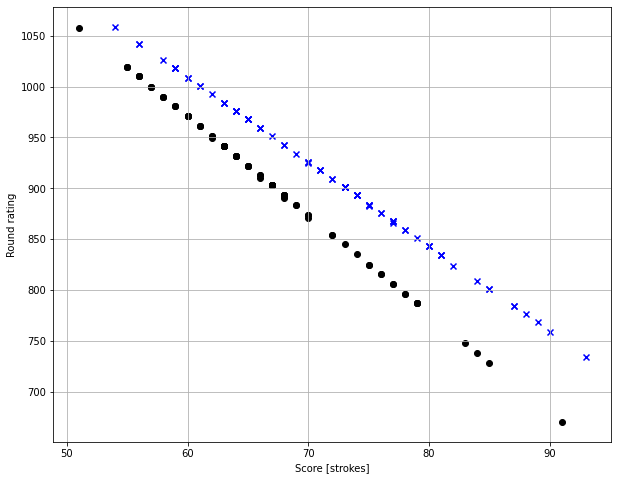

In [5]:
# Create a style guide for an arbitary number of lines:
markers = ['o','x','v','^','.']
colors = ['k','b','r','g','m']

nrounds = 2

fig, ax = plt.subplots(1, 1, figsize = [10, 8])

for n in range(nrounds):
    ax.scatter(df['Score ' + str(n+1)], df['Rating ' + str(n+1)], marker=markers[n], color=colors[n])
 
ax.set_xlabel('Score [strokes]')
ax.set_ylabel('Round rating')
plt.grid()
plt.show()
    

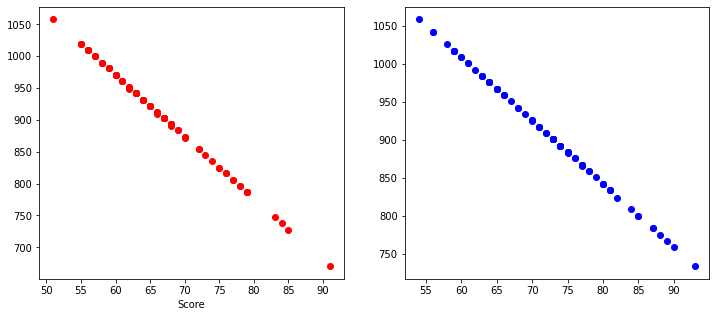

In [6]:
fig, ax = plt.subplots(1, 2, figsize = [12,5])

ax[0].scatter(df['Score 1'], df['Rating 1'], color ='r')
ax[0].set_xlabel('Score')
ax[1].scatter(df['Score 2'], df['Rating 2'], color ='b')

plt.show()